In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

sns.set(style='whitegrid')

In [6]:
# Load CSV
df = pd.read_csv('ponchosgoogletrends.csv', skiprows=1, index_col=0)
df.columns = ['Interest']  # Rename column
df.index = pd.to_datetime(df.index)  # Convert index to datetime
df = df.sort_index()
df.head()

,Interest
Week,
2020-07-05,34
2020-07-12,35
2020-07-19,36
2020-07-26,42
2020-08-02,41


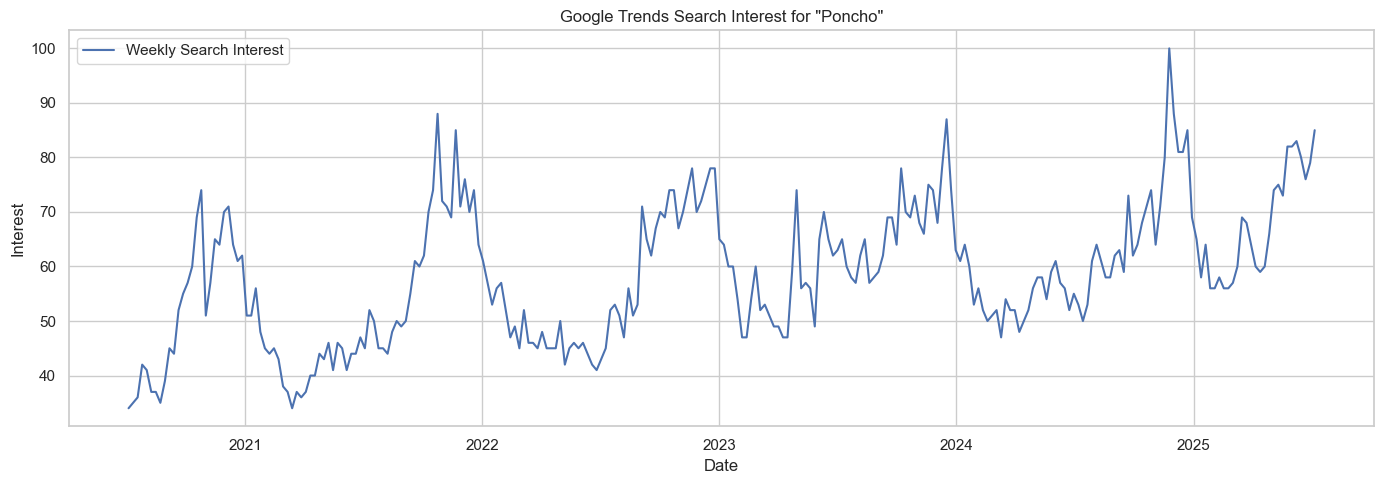

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Interest'], label='Weekly Search Interest')
plt.title('Google Trends Search Interest for "Poncho"')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.tight_layout()
plt.show()

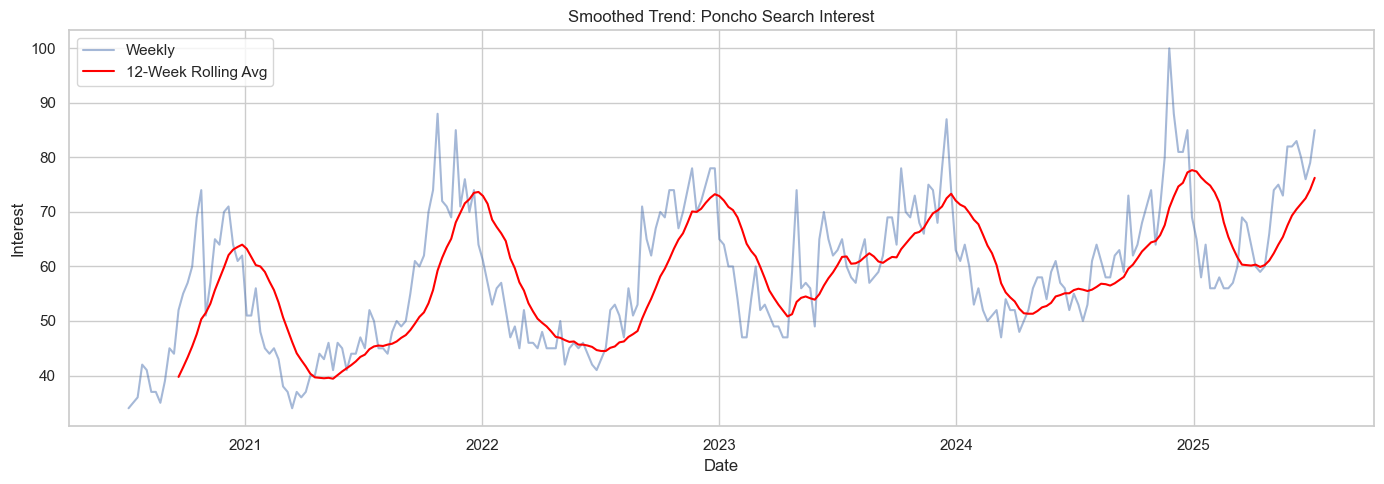

In [8]:
df['Rolling_12wk'] = df['Interest'].rolling(window=12).mean()

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Interest'], alpha=0.5, label='Weekly')
plt.plot(df.index, df['Rolling_12wk'], color='red', label='12-Week Rolling Avg')
plt.title('Smoothed Trend: Poncho Search Interest')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.tight_layout()
plt.show()

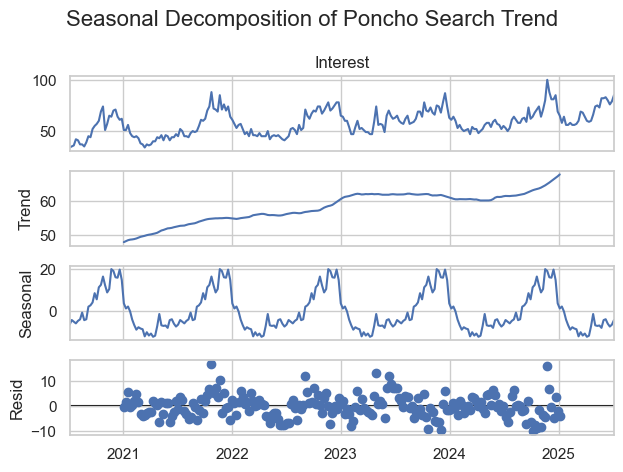

In [9]:
decomp = seasonal_decompose(df['Interest'], model='additive', period=52)
decomp.plot()
plt.suptitle('Seasonal Decomposition of Poncho Search Trend', fontsize=16)
plt.tight_layout()
plt.show()